In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Введение

Далее будет рассмотрена важная концепция для машинного и глубокого обучения. Норма - это то, что обычно используется для оценки ошибки модели. Например, она используется для расчета ошибки между выходом нейронной сети и ожидаемым значением (фактической меткой или значением). Норму можно представить как длину вектора. Это функция, которая обращает вектор в положительное значение.

# Нормы

Нормы - это любые функции, которые характеризуются следующими свойствами:

1. Нормы - это неотрицательные величины. Если представить норму как длину, то легко понять, почему она не может быть отрицательной.

2. Нормы равны $0$  тогда и только тогда, когда вектор является нулевым вектором.

3. Нормы соблюдают неравенство треугольника. См. ниже.

4. $||{{k}\cdot {u}}||=| {k}| \cdot |{{u}}|$ Норма вектора, умноженного на скаляр, равна абсолютному значению этого скаляра, умноженному на норму вектора.

5. Обычно записывается с двумя горизонтальными перекладинами: $||x||$

## Неравенство треугольника

Норма суммы некоторых векторов меньше или равна сумме норм этих векторов

$$ || u +v|| \leq ||u||+|v|||$$



## Пример 1


$
{u}=
\begin{bmatrix}
    1 & 6
\end{bmatrix}$ and ${v}=
\begin{bmatrix}
    4 & 2
\end{bmatrix}
$

$$ ||{{u}+{v}}|| = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43$$

$$ ||u||+||v|| = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55 $$

In [3]:
u = np.array([1, 6])
v = np.array([4, 2])

u, v

(array([1, 6]), array([4, 2]))

In [4]:
u+v

array([5, 8])

In [5]:
np.linalg.norm(u+v)

9.433981132056603

In [6]:
np.linalg.norm(u)+np.linalg.norm(v)

10.554898485297798

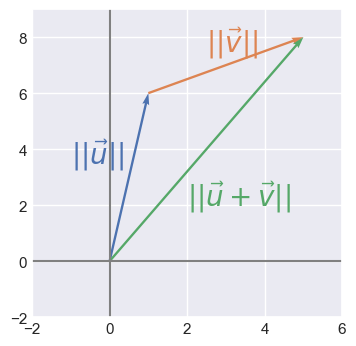

In [7]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette()[2], size=20)

plt.show()
plt.close()

Геометрически это просто означает, что кратчайший путь между двумя точками — это линия.

# P-нормы : Общие правила

Приведем способ получения $p$-нормы вектора:

1. Вычислите абсолютное значение каждого элемента
2. Возьмите степень $p$ этих абсолютных значений
3. Просуммируйте все приведенные абсолютные значения
4. Возьмите степень $\frac{1}{p}$ этого результата.

Более сжато это можно выразить формулой:

$$ ||{{x}}_p||=(\sum_i|{x}_i|^p)^{1/p}$$

Далее будут приведены примеры с использованием этих широко распространенных $p$-норм.

# Норма $L^1$

$p=1$, поэтому эта норма является просто суммой абсолютных значений:

$$
||{{x}}||_1=\sum_{i} |{x}_i|
$$.

# Евклидова норма (норма L^2)

Евклидова норма - это $p$-норма с $p=2$. В качестве такой нормы чаще используется квадратичная норма $L^2$.


$$
||{{x}}||_2=(\sum_i {x}_i^2)^{1/2}\Leftrightarrow \sqrt{\sum_i {x}_i^2}
$$.


Рассмотрим пример

## Пример 2

Графически евклидова норма соответствует длине вектора от начала координат до точки, полученной линейной комбинацией (как при применении теоремы Пифагора).

$$ {u}=
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}$$

$$ \begin{align*}
||{{u}}||_2 &=\sqrt{|3|^2+|4|^2}\\\\
&=\sqrt{25}\\\\
&=5
\end{align*} $$


Таким образом, норма $L^2$ равна $5$.

-----

Норму $L^2$ можно вычислить с помощью функции `linalg.norm` из `numpy`. Проверить результат можно следующим образом

In [8]:
np.linalg.norm([3, 4])

5.0

Ниже представлено графическое изображение векторов:

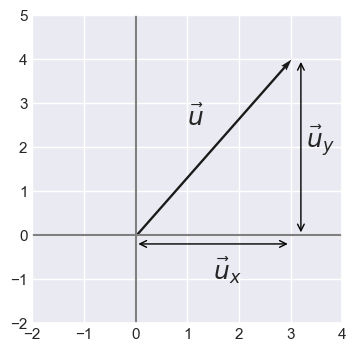

In [9]:
u = [0,0,3,4]

plt.quiver([u[0]],
           [u[1]],
           [u[2]],
           [u[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.annotate('', xy = (3.2, 0), xytext = (3.2, 4),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('', xy = (0, -0.2), xytext = (3, -0.2),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))

plt.text(1, 2.5, r'$\vec{u}$', size=18)
plt.text(3.3, 2, r'$\vec{u}_y$', size=18)
plt.text(1.5, -1, r'$\vec{u}_x$', size=18)

plt.show()
plt.close()

В данном случае вектор находится в двумерном пространстве, но это справедливо и для большего числа измерений.

$$ u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}$$


$$
||u||_2 = \sqrt{u_1^2+u_2^2+\cdots+u_n^2}
$$.

# Квадратичная евклидова норма 

$$ 
sum_i|{x}_i|^2 
$$.

Квадратичная норма $L^2$ удобна тем, что она удаляет квадратный корень, и в итоге получается простая сумма всех квадратных значений вектора.

-----

Квадратичная евклидова норма широко используется в машинном обучении отчасти потому, что ее можно вычислить с помощью векторной операции
$
{x}^\text{T}{x}
$.

## Пример 3:

$$ {x}=
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}$$

$$ {x}^\text{T}=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix}$$

$$ \begin{align*}
{x}^\text{T}{x}&=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} \times
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}\\\\
&= 2\times 2 + 5\times 5 + 3\times 3 + 3\times 3= 47
\end{align*}$$



In [10]:
x = np.array([[2], [5], [3], [3]])
euclideanNorm = x.T.dot(x)
euclideanNorm

array([[47]])

In [11]:
np.linalg.norm(x)**2

47.0

# Производная квадратичной нормы $L^2$

Еще одним преимуществом квадратичной нормы $L^2$|| является то, что ее частная производная легко вычисляется.

$$ u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}$$


$$ ||{u}||_2 = u_1^2+u_2^2+\cdots+u_n^2 $$

$$ \begin{cases}
\dfrac{d||{u}||_2}{du_1} = 2u_1\\\\
\dfrac{d||{u}||_2}{du_2} = 2u_2\\\\
\cdots\\\\
\dfrac{d||{u}||_2}{du_n} = 2u_n
\end{cases}$$

# Производная от $L^2$

В случае с нормой $L^2$ производная сложнее и учитывает все элементы вектора:

 $$
 ||{u}||_2 = \sqrt{(u_1^2+u_2^2+\cdots+u_n^2)} = (u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}
 $$.

$$
\begin{align*}
\dfrac{d||{u}||_2}{du_1} &=
\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}-1}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{-\frac{1}{2}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
2\cdot u_1\\\\
&=\dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{align*}
$$


$$
\begin{cases}
\dfrac{d||{u}||_2}{du_1} = \dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\dfrac{d||{u}||_2}{du_2} = \dfrac{u_2}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\cdots\\\\
\dfrac{d||{u}||_2}{du_n} = \dfrac{u_n}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{cases}
$$

Одна из проблем квадратичной нормы $L^2$ заключается в том, что она с трудом обнаруживает различия между 0 и малыми значениями, поскольку возрастание функции происходит медленно.

# Максимальная норма
 
Норма $L^{\infty}$ соответствует абсолютному значению наибольшего элемента вектора.

 $$ ||{{x}}||_\infty = \max\limits_i|x_i| $$

## Матричные нормы: Норма Фробениуса

$$
||{{A}}||_F=\sqrt{\sum_{i,j}A^2_{i,j}}
$$

Это эквивалентно взятию $L^2$ норму матрицы после уплощения.

-----

Также можно использовать ту же функцию Numpy:

In [12]:
A = np.array([[1, 2], [6, 4], [3, 2]])
np.linalg.norm(A)

8.366600265340756

# Выражение точечного произведения с нормами

$$
{x}^\text{T}{y} = ||{{x}}||_2\cdot||{{y}}||_2\cos\theta
$$.


## Пример 4

$$
{x}=
\begin{bmatrix}
    0 \\\\
    2
\end{bmatrix}
$$
и 
$$
{y}=
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
$$.

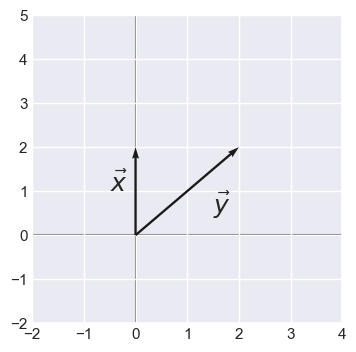

In [13]:
x = [0,0,0,2]
y = [0,0,2,2]

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.text(-0.5, 1, r'$\vec{x}$', size=18)
plt.text(1.5, 0.5, r'$\vec{y}$', size=18)

plt.show()
plt.close()

Данный пример отличается простотой. Как видим, угол $\theta$ равен 45°

$$ {x^\text{T}y}=
\begin{bmatrix}
    0 & 2
\end{bmatrix} \cdot
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
0\times2+2\times2 = 4$$

и

$$ ||{{x}}||_2=\sqrt{0^2+2^2}=\sqrt{4}=2$$

$$ ||{{y}}||_2=\sqrt{2^2+2^2}=\sqrt{8}$$

$$ 2\times\sqrt{8}\times cos(45)=4$$ 

------

Вот операции с использованием `numpy`

In [14]:
# Примечание: np.cos принимает угол в радианах
np.cos(np.deg2rad(45))*2*np.sqrt(8)

4.000000000000001